In [17]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.optimizers import Adam
import tensorflow_addons as tfa

import tensorflow as tf

In [12]:
#Load in dataset
#train_data_path ='C:\Train_test.xlsx'
#test_data_path = 'C:\Test_test.xlsx'
#train_data = pd.read_excel(train_data_path, header=None)
#test_data = pd.read_csv(test_data_path, header=None)
#x_train, y_train = train_data.x.as_matrix()
#x_test, y_test = test_data.x.as_matrix()

In [13]:
#USING A RANDOMLY GENERATED DATASET SINCE THE TOP CODE DOESNT WORK:
#This data has 1000 inputs, 10 inputs 5 of which are redundant (where inputs is the number of columns in the table), with 3 outputs
#X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, n_targets=3, random_state=2)
#print(X.shape, y.shape)

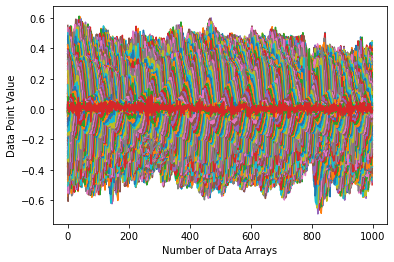

(999, 1024)
(999, 1024)



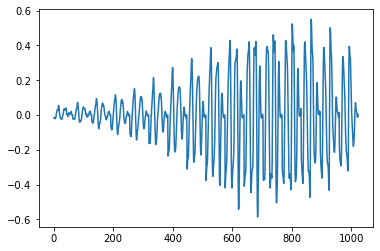

In [14]:
#DATASET
dataframeINPUT = pd.read_csv('Inputs.csv')
dataframeOUTPUT = pd.read_csv('Outputs.csv')
X, Y = dataframeINPUT.to_numpy(), dataframeOUTPUT.to_numpy()
plt.plot(Y)
plt.xlabel("Number of Data Arrays")
plt.ylabel("Data Point Value")
plt.savefig("Original_Complete_Dataset.png")
plt.show()
xtrain, xtest, ytrain, ytest=train_test_split(X, Y, test_size=0.5,shuffle=False)
#xtrain = X[ 0::2]
#xtest = X[ 1::2]
#ytrain = Y[ 0::2]
#ytest = Y[ 1::2]

print(X.shape)
print(Y.shape)
in_dim = X.shape[1]
out_dim = Y.shape[1]
plt.plot(Y[0])
print()

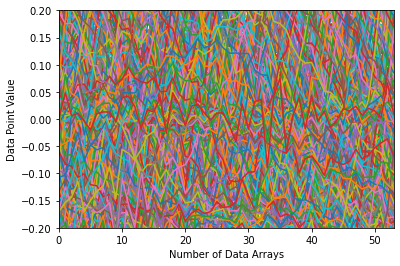

In [15]:
plt.plot(Y)
plt.xlim(0,53)
plt.ylim(-0.2,0.2)
plt.xlabel("Number of Data Arrays")
plt.ylabel("Data Point Value")
plt.savefig("Original_Complete_Dataset_XLIM=53.png")
plt.show()

In [18]:
class LNNorm(tf.keras.losses.Loss):
  def __init__(self, n):
    super().__init__()
    self.n = n
  
  def call(self, y_true, y_pred):
     return tf.norm(y_pred - y_true, ord=self.n)**self.n/float(len(y_true))


In [53]:
#define the neural network for the task
model = Sequential()
model.add(Dense(1600, input_dim=in_dim, activation="relu")) # most optimial with relu
model.add(Dense(3200, activation="relu"))
model.add(Dense(3200, activation="relu"))


model.add(Dense(out_dim))
model.compile(loss=LNNorm(1), optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005)) # most optimal with mse (mae isnt great since theres negatives in data) and adam
#CAN USE PAPERS TO JUSTIFY WHY ADAM OVER OTHER OPTIMIZERS
 
model.summary()

#fit model with training data

model.fit(xtrain, ytrain, epochs=100, batch_size=100, verbose=0)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 1600)              1640000   
                                                                 
 dense_41 (Dense)            (None, 3200)              5123200   
                                                                 
 dense_42 (Dense)            (None, 3200)              10243200  
                                                                 
 dense_43 (Dense)            (None, 1024)              3277824   
                                                                 
Total params: 20,284,224
Trainable params: 20,284,224
Non-trainable params: 0
_________________________________________________________________


16/16 [==============================] - 0s 14ms/step
(500, 1024)
(500, 1024)
(500, 1024)


-58369740.0

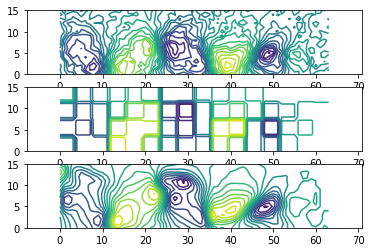

In [54]:
ypred = model.predict(xtest)
np.savetxt("Predictions.csv", ypred, delimiter=",")
MSE_Values = []
MSE_Index = []
for MSE in list(range(0,len(ytest))):
    MSE_Index.append("y{}".format(MSE+1))
    #MSE_Values.append(mean_squared_error(ytest[MSE], ypred[MSE]))
    MSE_Values.append(LNNorm(1)(ytest[MSE], ypred[MSE]))
MSE_Output = {'y':MSE_Index, 'Value':MSE_Values}
df = pd.DataFrame(MSE_Output)
df.to_csv("MSE_Output.csv")
print(xtest.shape)
print(ytest.shape)
print(ypred.shape)

jj = ypred[448,:]
kk = np.reshape(jj,(16,64))
ll = xtest[448,:]
mm = np.reshape(ll,(16,64))
nn = ytest[448,:]
oo = np.reshape(nn,(16,64))
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
ax1.contour(np.flipud(kk),20)
ax1.axis('equal')
ax2.contour(np.flipud(mm),20)
ax2.axis('equal')
ax3.contour(np.flipud(oo),20)
ax3.axis('equal')
metric = tfa.metrics.r_square.RSquare()
metric.update_state(ytest, ypred)
result = metric.result()
result.numpy()

range(0, 500)
(201,)


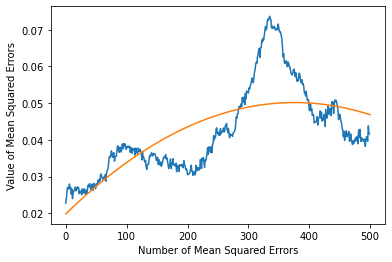

0.04227548838804816


95

In [55]:
#PRINT MSE FOR DIFFERENT OPTIMIZERS AFTER EXPLAINING WHY MSE OVER MAE etc
#USE THAT MSE OUTPUT TO MAKE A GRAPH OF ERROR TO MAKE A JUDGEMENT OF WHICH IS BEST TO USE
x_ax = range(len(xtest))
print(x_ax)
x = np.linspace(0,500,201)
print(x.shape)

plt.plot(x_ax, MSE_Values, label ="Mean Squared Error")
a,b,c = np.polyfit(x_ax, MSE_Values,2)


plt.plot(x, a*((x)**2)+(b*x)+c, label = "Trend Line")
plt.xlabel("Number of Mean Squared Errors")
plt.ylabel("Value of Mean Squared Errors")
plt.savefig("Mean Squared Error of Model.png")
plt.show()

print(np.mean(MSE_Values))
np.argmax(MSE_Values[0:100])


In [9]:
metric = tfa.metrics.r_square.RSquare()
metric.update_state(ytest, ypred)

result = metric.result()
result.numpy()
#plt.hist(ypred.flatten())
#plt.hist(ytest.flatten())
#plt.hist(((ypred - ytest) /(ytest + 1e-12)).flatten(), bins=np.linspace(-10, 10, 100))



-126335144.0

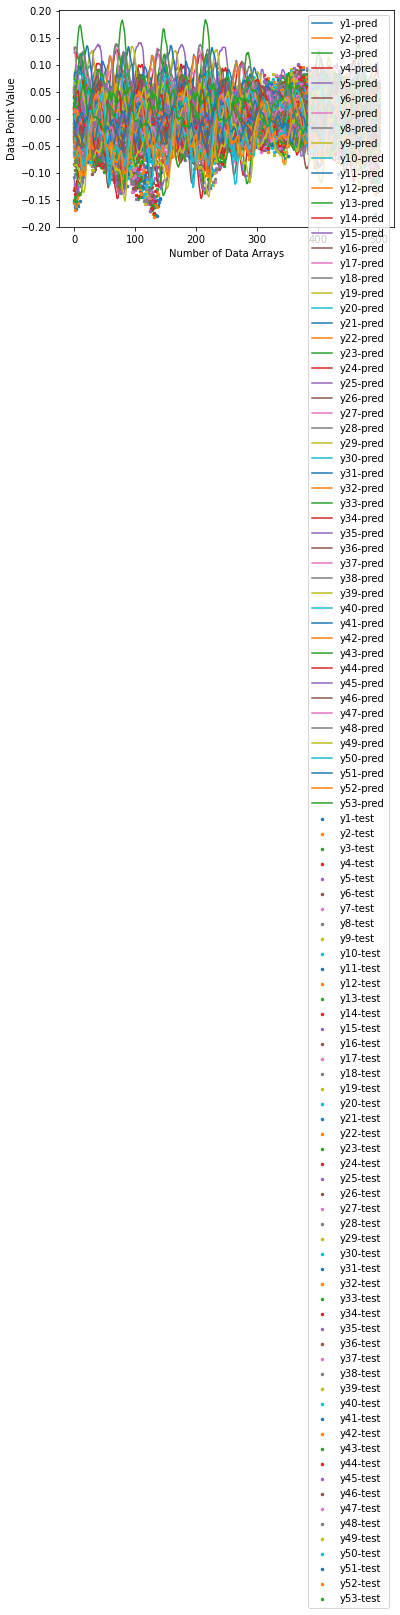

In [10]:
#plot predicited values vs actual:
x_ax = range(len(xtest))
for MSE in list(range(0,53)):
    plt.scatter(x_ax, ytest[:,MSE],s=6, label="y{}-test".format(MSE+1))
    plt.plot(x_ax, ypred[:,MSE], label="y{}-pred".format(MSE+1))
plt.legend()
plt.xlabel("Number of Data Arrays")
plt.ylabel("Data Point Value")
plt.savefig("Predicted_Values_vs_Test.png")
plt.show()

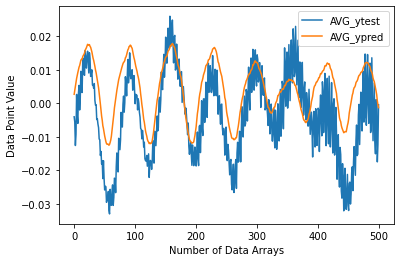

In [11]:
avg_test = []
avg_pred = []
for avg in list(range(0,len(ytest))):
    avg_test.append(sum(ytest[avg][:])/len(ytest[avg][:]))
    avg_pred.append(sum(ypred[avg][:])/len(ypred[avg][:]))
plt.plot(x_ax, avg_test, label = "AVG_ytest")
plt.plot(x_ax, avg_pred, label = "AVG_ypred")
plt.legend()
plt.xlabel("Number of Data Arrays")
plt.ylabel("Data Point Value")
plt.savefig("AVG_Predicted_vs_AVG_Test.png")
plt.show()



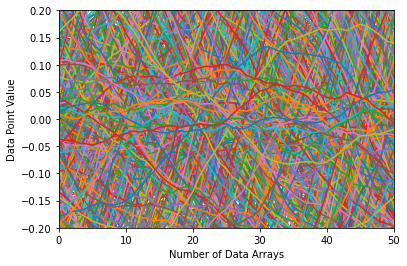

(500, 1024)


In [12]:
plt.plot(ypred)
plt.xlim(0,50)
plt.ylim(-0.2,0.2)
plt.xlabel("Number of Data Arrays")
plt.ylabel("Data Point Value")
plt.savefig("ypred_XLIM=53.png")
plt.show()
print(ypred.shape)

In [13]:
class LNNorm(tf.keras.losses.Loss):
  def __init__(self, ord):
    super().__init__()
    self.ord = ord
  
  def call(self, y_true, y_pred):
     return tf.norm(tf.subtract(y_pred, y_true), ord=self.ord)
=LNNorm(4)
=LNNorm(5)
=LNNorm(6)



SyntaxError: invalid syntax (<ipython-input-13-c89cd1b2e1a5>, line 8)